In [1]:
#1. Implement a Kalman filter to predict and update the state of an object given its measurements



import numpy as np

class KalmanFilter:
    def __init__(self, F, H, Q, R, P, x):
        """
        Initialize the Kalman Filter.

        Parameters:
        F (numpy.ndarray): State transition model.
        H (numpy.ndarray): Observation model.
        Q (numpy.ndarray): Process noise covariance.
        R (numpy.ndarray): Measurement noise covariance.
        P (numpy.ndarray): Initial estimate error covariance.
        x (numpy.ndarray): Initial state estimate.
        """
        self.F = F
        self.H = H
        self.Q = Q
        self.R = R
        self.P = P
        self.x = x

    def predict(self):
        """Predict the next state and estimate covariance."""
        # State prediction
        self.x = np.dot(self.F, self.x)

        # Covariance prediction
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update(self, z):
        """Update the state and estimate covariance with a new measurement."""
        # Measurement residual
        y = z - np.dot(self.H, self.x)

        # Residual covariance
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R

        # Kalman gain
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))

        # State update
        self.x = self.x + np.dot(K, y)

        # Covariance update
        I = np.eye(self.P.shape[0])
        self.P = np.dot(I - np.dot(K, self.H), self.P)

    def current_state(self):
        """Return the current state estimate."""
        return self.x

# Example usage
if __name__ == "__main__":
    # Define dimensions
    n = 2  # State dimension
    m = 1  # Measurement dimension

    # Initialize matrices
    F = np.array([[1, 1], [0, 1]])  # State transition model
    H = np.array([[1, 0]])          # Observation model
    Q = np.array([[0.01, 0], [0, 0.01]])  # Process noise covariance
    R = np.array([[0.1]])                  # Measurement noise covariance
    P = np.eye(n)                          # Initial estimate error covariance
    x = np.array([0, 1])                   # Initial state estimate

    # Create Kalman filter instance
    kf = KalmanFilter(F, H, Q, R, P, x)

    # Simulated measurements
    measurements = [1.2, 2.8, 4.1, 5.3, 6.8]

    # Run the filter
    for z in measurements:
        print("Measurement:", z)
        kf.predict()
        kf.update(np.array([z]))
        print("Predicted state:", kf.current_state())
        print()



Measurement: 1.2
Predicted state: [1.19052133 1.09478673]

Measurement: 2.8
Predicted state: [2.73844235 1.4539508 ]

Measurement: 4.1
Predicted state: [4.11938918 1.41348619]

Measurement: 5.3
Predicted state: [5.3696981  1.34287538]

Measurement: 6.8
Predicted state: [6.76849589 1.36401979]



In [2]:
#2. Write a function to normalize an image array such that pixel values are scaled between 0 and 1

import numpy as np

def normalize_image_array(image_array):
    """
    Normalize an image array by scaling pixel values between 0 and 1.

    Args:
        image_array (numpy.ndarray): Input image array.

    Returns:
        numpy.ndarray: Normalized image array.
    """

    # Get the minimum and maximum pixel values in the image array
    min_pixel_value = np.min(image_array)
    max_pixel_value = np.max(image_array)

    # Scale pixel values between 0 and 1 using the formula: (x - min) / (max - min)
    normalized_array = (image_array - min_pixel_value) / (max_pixel_value - min_pixel_value)

    return normalized_array

# Example usage
image_array = np.random.randint(0, 256, size=(256, 256))  # Simulate a random 256x256 image
normalized_array = normalize_image_array(image_array)

print("Original Image Array:")
print(image_array)
print("\nNormalized Image Array:")
print(normalized_array)






Original Image Array:
[[160 191 140 ...  38  29 159]
 [150 145 111 ...  73 114  85]
 [243 204 115 ... 136  61 191]
 ...
 [217 124 213 ... 119  69 152]
 [146  36 122 ...  79 154 170]
 [ 78 199   4 ... 205 164  68]]

Normalized Image Array:
[[0.62745098 0.74901961 0.54901961 ... 0.14901961 0.11372549 0.62352941]
 [0.58823529 0.56862745 0.43529412 ... 0.28627451 0.44705882 0.33333333]
 [0.95294118 0.8        0.45098039 ... 0.53333333 0.23921569 0.74901961]
 ...
 [0.85098039 0.48627451 0.83529412 ... 0.46666667 0.27058824 0.59607843]
 [0.57254902 0.14117647 0.47843137 ... 0.30980392 0.60392157 0.66666667]
 [0.30588235 0.78039216 0.01568627 ... 0.80392157 0.64313725 0.26666667]]


In [4]:
#3. Create a function to generate dummy object detection data with confidence scores and bounding boxes. Filter the detections based on a confidence thresholdC

import random

def generate_dummy_detections(num_detections=10, image_width=640, image_height=480):
    """
    Generates dummy object detection data with bounding boxes and confidence scores.

    Parameters:
        num_detections (int): Number of detections to generate.
        image_width (int): Width of the image (for bounding box limits).
        image_height (int): Height of the image (for bounding box limits).

    Returns:
        list[dict]: A list of dictionaries, each containing a bounding box and a confidence score.
    """
    detections = []
    for _ in range(num_detections):
        x_min = random.randint(0, image_width - 1)
        y_min = random.randint(0, image_height - 1)
        x_max = random.randint(x_min + 1, image_width)
        y_max = random.randint(y_min + 1, image_height)
        confidence = random.uniform(0, 1)

        detections.append({
            "bbox": [x_min, y_min, x_max, y_max],  # [x_min, y_min, x_max, y_max]
            "confidence": confidence
        })

    return detections

def filter_detections(detections, confidence_threshold=0.5):
    """
    Filters object detections based on a confidence threshold.

    Parameters:
        detections (list[dict]): A list of detection dictionaries with bounding boxes and confidence scores.
        confidence_threshold (float): The minimum confidence score to keep a detection.

    Returns:
        list[dict]: A filtered list of detections that meet the confidence threshold.
    """
    filtered = [detection for detection in detections if detection["confidence"] >= confidence_threshold]
    return filtered

# Example Usage
if __name__ == "__main__":
    # Generate dummy detections
    dummy_detections = generate_dummy_detections(num_detections=15)
    print("Generated Detections:")
    for det in dummy_detections:
        print(det)

    # Filter detections based on a confidence threshold
    confidence_threshold = 0.5
    filtered_detections = filter_detections(dummy_detections, confidence_threshold=confidence_threshold)

    print("\nFiltered Detections:")
    for det in filtered_detections:
        print(det)

Generated Detections:
{'bbox': [569, 397, 622, 425], 'confidence': 0.045159623634079105}
{'bbox': [147, 478, 268, 479], 'confidence': 0.4213383860674692}
{'bbox': [508, 291, 533, 421], 'confidence': 0.35314227667883336}
{'bbox': [508, 305, 572, 324], 'confidence': 0.5374705018835119}
{'bbox': [266, 377, 625, 405], 'confidence': 0.007977918180182342}
{'bbox': [606, 22, 615, 51], 'confidence': 0.28979881718972367}
{'bbox': [97, 35, 471, 455], 'confidence': 0.10223062436711439}
{'bbox': [12, 35, 532, 199], 'confidence': 0.9841297317701064}
{'bbox': [630, 191, 640, 271], 'confidence': 0.19619868222927817}
{'bbox': [611, 135, 622, 425], 'confidence': 0.8021823646521244}
{'bbox': [16, 358, 488, 443], 'confidence': 0.09136063312383258}
{'bbox': [533, 241, 600, 318], 'confidence': 0.8632344445214293}
{'bbox': [226, 114, 562, 288], 'confidence': 0.38135100456129123}
{'bbox': [389, 78, 441, 407], 'confidence': 0.8916391006505481}
{'bbox': [171, 82, 552, 383], 'confidence': 0.6931619656942833}

F

In [5]:
#5. Write a function to re-identify objects by matching feature vectors based on Euclidean distance

import numpy as np

def re_identify_objects(feature_vectors, query_vector, threshold=0.5):
    """
    Re-identify objects by matching feature vectors based on Euclidean distance.

    Args:
        feature_vectors (list of numpy.ndarray): List of feature vectors for known objects.
        query_vector (numpy.ndarray): Feature vector for the object to be re-identified.
        threshold (float, optional): Maximum Euclidean distance for a match. Defaults to 0.5.

    Returns:
        int: Index of the matched object in the feature_vectors list. Returns -1 if no match is found.
    """

    # Initialize minimum distance and index of the matched object

    min_distance = float('inf')
    matched_index = -1

    # Iterate over the feature vectors of known objects
    for i, vector in enumerate(feature_vectors):
        # Calculate the Euclidean distance between the query vector and the current feature vector
        distance = np.linalg.norm(query_vector - vector)

        # Check if the distance is less than the threshold and update the minimum distance and matched index
        if distance < threshold and distance < min_distance:
            min_distance = distance
            matched_index = i

    return matched_index

# Example usage
feature_vectors = [
    np.array([1.0, 2.0, 3.0]),
    np.array([4.0, 5.0, 6.0]),
    np.array([7.0, 8.0, 9.0])
]

query_vector = np.array([1.1, 2.1, 3.1])
threshold = 0.5

matched_index = re_identify_objects(feature_vectors, query_vector, threshold)

if matched_index != -1:
    print(f"Matched object index: {matched_index}")
else:
    print("No match found")


Matched object index: 0


In [10]:
#6. Write a function to track object positions using YOLO detections and a Kalman Filter
import filterpy
import cv2
import numpy as np
# !pip install filterpy

from filterpy.kalman import KalmanFilter

def track_object_positions(yolo_detections, initial_state=None):
    """
    Track object positions using YOLO detections and a Kalman Filter.

    Args:
        yolo_detections (list of tuples): YOLO detections in the format (x, y, w, h, class_id, confidence).
        initial_state (numpy.ndarray, optional): Initial state of the Kalman Filter. Defaults to None.

    Returns:
        list of tuples: Tracked object positions in the format (x, y, w, h, class_id, confidence).
    """

    # Initialize the Kalman Filter
    kf = KalmanFilter(dim_x=4, dim_z=2)

    # Define the state transition matrix
    kf.F = np.array([[1, 0, 1, 0],
                       [0, 1, 0, 1],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]])

    # Define the measurement matrix
    kf.H = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0]])

    # Define the process noise covariance matrix
    kf.Q = np.eye(4) * 0.1

    # Define the measurement noise covariance matrix
    kf.R = np.eye(2) * 0.1

    # Initialize the state covariance matrix
    kf.P *= 100

    # Initialize the tracked object positions
    tracked_positions = []

    # Iterate over the YOLO detections
    for detection in yolo_detections:
        # Extract the detection coordinates
        x, y, w, h, class_id, confidence = detection

        # Create a measurement vector
        measurement = np.array([x + w / 2, y + h / 2])

        # Predict the state using the Kalman Filter
        kf.predict()

        # Update the state using the measurement
        kf.update(measurement)

        # Extract the tracked object position
        tracked_x = kf.x[0] - w / 2
        tracked_y = kf.x[1] - h / 2

        # Append the tracked object position to the list
        tracked_positions.append((tracked_x, tracked_y, w, h, class_id, confidence))

    return tracked_positions

# Example usage
yolo_detections = [
    (10, 10, 50, 50, 0, 0.8),
    (20, 20, 50, 50, 0, 0.9),
    (30, 30, 50, 50, 0, 0.7)
]

tracked_positions = track_object_positions(yolo_detections)

for position in tracked_positions:
    print(position)

(array([9.98251748]), array([9.98251748]), 50, 50, 0, 0.8)
(array([20.01476768]), array([20.01476768]), 50, 50, 0, 0.9)
(array([30.0093669]), array([30.0093669]), 50, 50, 0, 0.7)


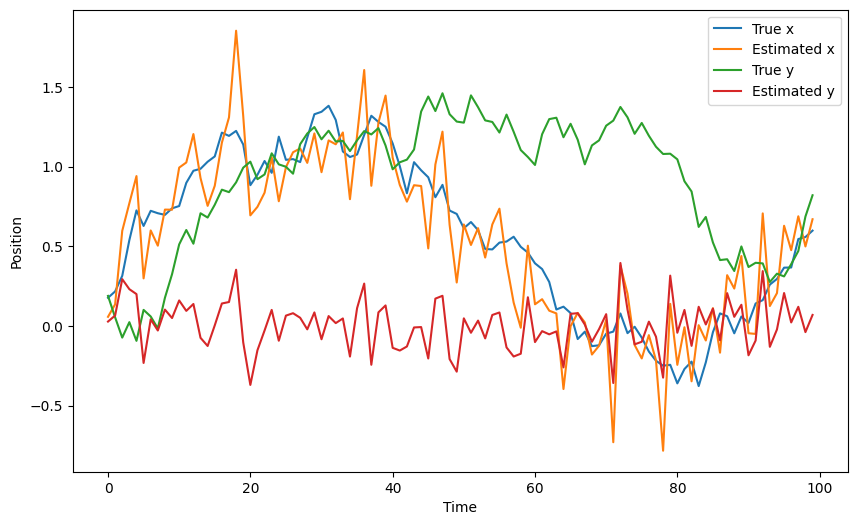

In [7]:
#7. Implement a simple Kalman Filter to track an object's position in a 2D space (simulate the object's movement with random noise).


import numpy as np
import matplotlib.pyplot as plt

# Define the system parameters
dt = 1.0  # Time step
F = np.array([[1, dt], [0, 1]])  # State transition matrix
H = np.array([[1, 0]])  # Measurement matrix
Q = np.array([[0.1, 0], [0, 0.1]])  # Process noise covariance matrix
R = np.array([[0.1]])  # Measurement noise covariance matrix

# Initialize the state and covariance
x = np.array([0.0, 0.0])  # Initial state
P = np.eye(2)  # Initial covariance

# Simulate the object's movement
np.random.seed(0)
t = np.arange(0, 100, dt)
x_true = np.cumsum(np.random.normal(0, 0.1, size=len(t)))
y_true = np.cumsum(np.random.normal(0, 0.1, size=len(t)))
z = np.array([x_true + np.random.normal(0, np.sqrt(R[0, 0]), size=len(t))])

# Implement the Kalman Filter
x_est = np.zeros((len(t), 2))
P_est = np.zeros((len(t), 2, 2))
for i in range(len(t)):
    # Predict the state
    x_pred = F @ x
    P_pred = F @ P @ F.T + Q

    # Update the state
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    x = x_pred + K @ (z[0, i] - H @ x_pred)
    P = (np.eye(2) - K @ H) @ P_pred

    # Store the estimated state and covariance
    x_est[i] = x
    P_est[i] = P

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x_true, label='True x')
plt.plot(t, x_est[:, 0], label='Estimated x')
plt.plot(t, y_true, label='True y')
plt.plot(t, x_est[:, 1], label='Estimated y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

In [ ]:
#7.